### Ion Behavior with NPF events

In [1]:
# Import necessary libraries
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/coliewo/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/coliewo/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/home/coliewo/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [18]:
nais = xr.open_dataset("/home/coliewo/Desktop/DATA/CNR/nais_may_oct.nc")
# Replace negative values with NaN across all variables in the dataset
for var in nais.data_vars:
    nais[var] = nais[var].where(nais[var] >= 0, other=np.nan)

nais

<xarray.Dataset>
Dimensions:             (diameter: 55, flag: 102, time: 3986)
Coordinates:
  * diameter            (diameter) float64 8.029e-10 8.628e-10 ... 4.155e-08
  * flag                (flag) <U61 '+ postfilter voltage may be too high' .....
  * time                (time) datetime64[ns] 2024-05-17 ... 2024-10-30
Data variables:
    neg_ions            (time, diameter) float64 nan nan nan ... 1.969e+03 nan
    pos_ions            (time, diameter) float64 nan nan nan ... 1.815e+03 nan
    neg_particles       (time, diameter) float64 nan nan ... 8.7e+03 8.971e+03
    pos_particles       (time, diameter) float64 nan nan ... 1.439e+04 1.408e+04
    neg_ion_flags       (time, flag) float64 0.0 0.0 0.0 0.0 ... nan nan nan nan
    pos_ion_flags       (time, flag) float64 0.0 0.0 0.0 0.0 ... nan nan nan nan
    neg_particle_flags  (time, flag) float64 0.0 0.0 0.0 0.0 ... nan nan nan nan
    pos_particle_flags  (time, flag) float64 0.0 0.0 0.0 0.0 ... nan nan nan nan
Attributes: (12/14)
    measurement_location:            CNR Bologna
    description:                     Rooftop Measurements
    longitude:                       11.34
    latitude:                        44.52
    inlet_length:                    0.85
    do_inlet_loss_correction:        True
    ...                              ...
    remove_corona_ions:              True
    fill_temperature:                273.15
    fill_pressure:                   101325.0
    fill_flowrate:                   54.0
    dilution_on:                     False
    resolution:                      5min

In [19]:
# Extract the necessary variables
neg_ions = nais['neg_ions']
pos_ions = nais['pos_ions']

# Calculate particles (positive + negative particles)
particles = nais['pos_particles'] + nais['neg_particles']

In [20]:
neg_ions

<xarray.DataArray 'neg_ions' (time: 3986, diameter: 55)>
array([[          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       ...,
       [  31.63091365,  345.16944434,  968.08487805, ..., 1429.1653403 ,
        1737.90083918,           nan],
       [  31.51289756,  345.09614876,  965.43525421, ..., 1353.77972472,
        1645.45563554,           nan],
       [ 104.03686586,  545.07026637, 1278.12923272, ..., 1389.77664339,
        1968.70252007,           nan]])
Coordinates:
  * diameter  (diameter) float64 8.029e-10 8.628e-10 ... 3.846e-08 4.155e-08
  * time      (time) datetime64[ns] 2024-05-17 ... 2024-10-30
Attributes:
    units:        cm-3
    description:  Negative ion number-size distribution (dN/dlogDp)

In [21]:
# Divide the data into the small, large, and intermediate particles
small_neg_ions = neg_ions.sel(diameter=slice(0.8e-9,1.6e-9))
small_pos_ions = pos_ions.sel(diameter=slice(0.8e-9,1.6e-9))
intermediate_neg_ions = neg_ions.sel(diameter=slice(1.6e-9,7.5e-9))
intermediate_pos_ions = pos_ions.sel(diameter=slice(1.6e-9,7.5e-9))
large_neg_ions = neg_ions.sel(diameter=slice(7.5e-9,22.0e-9))
large_pos_ions = pos_ions.sel(diameter=slice(7.5e-9,22.0e-9))     

In [22]:
small_neg_ions

<xarray.DataArray 'neg_ions' (time: 3986, diameter: 10)>
array([[          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       ...,
       [  31.63091365,  345.16944434,  968.08487805, ...,  240.16410387,
          52.26011584,   11.55697303],
       [  31.51289756,  345.09614876,  965.43525421, ...,  206.65458122,
          56.26939564,   11.79948897],
       [ 104.03686586,  545.07026637, 1278.12923272, ...,  267.00509835,
         109.46632666,   53.36729235]])
Coordinates:
  * diameter  (diameter) float64 8.029e-10 8.628e-10 ... 1.429e-09 1.535e-09
  * time      (time) datetime64[ns] 2024-05-17 ... 2024-10-30
Attributes:
    units:        cm-3
    description:  Negative ion number-size distribution (dN/dlogDp)

In [23]:
# Mean over each diameter range
small_neg_i = small_neg_ions.mean(dim='diameter')
small_pos_i = small_pos_ions.mean(dim='diameter')
intermediate_neg_i = intermediate_neg_ions.mean(dim='diameter')
intermediate_pos_i = intermediate_pos_ions.mean(dim='diameter')
large_neg_i = large_neg_ions.mean(dim='diameter')
large_pos_i = large_pos_ions.mean(dim='diameter')

In [24]:
#Diurnal cycles
small_neg_ions_diurnal_variation = small_neg_i.groupby(small_neg_i.time.dt.hour).mean(dim='time')
small_pos_ions_diurnal_variation = small_pos_i.groupby(small_pos_i.time.dt.hour).mean(dim='time')
intermediate_neg_ions_diurnal_variation = intermediate_neg_i.groupby(intermediate_neg_i.time.dt.hour).mean(dim='time')
intermediate_pos_ions_diurnal_variation = intermediate_pos_i.groupby(intermediate_pos_i.time.dt.hour).mean(dim='time')
large_neg_ions_diurnal_variation = large_neg_i.groupby(large_neg_i.time.dt.hour).mean(dim='time')
large_pos_ions_diurnal_variation = large_pos_i.groupby(large_pos_i.time.dt.hour).mean(dim='time')

In [25]:
#standard error of the mean (SEM)
small_neg_ions_SEM = small_neg_i.groupby(small_neg_i.time.dt.hour).std(dim='time') / np.sqrt(45)
small_pos_ions_SEM = small_pos_i.groupby(small_pos_i.time.dt.hour).std(dim='time') / np.sqrt(45)
intermediate_neg_ions_SEM = intermediate_neg_i.groupby(intermediate_neg_i.time.dt.hour).std(dim='time') / np.sqrt(45)
intermediate_pos_ions_SEM = intermediate_pos_i.groupby(intermediate_pos_i.time.dt.hour).std(dim='time') / np.sqrt(45)
large_neg_ions_SEM = large_neg_i.groupby(large_neg_i.time.dt.hour).std(dim='time') / np.sqrt(45)
large_pos_ions_SEM = large_pos_i.groupby(large_pos_i.time.dt.hour).std(dim='time') / np.sqrt(45)

In [26]:
small_neg_ions_diurnal_variation

<xarray.DataArray 'neg_ions' (hour: 24)>
array([1190.11729352, 1271.57987224, 1328.46262884, 1346.03592055,
       1284.02119796, 1173.47315385, 1067.34471859,  929.15844633,
        844.21066125,  793.21011253,  764.05365294,  814.44389189,
        785.88027163,  866.4656915 ,  833.23348374,  849.85575197,
        866.2896266 ,  834.46637285, 1025.40678367,  982.52351024,
        967.95152313,  994.62109992, 1068.17325381, 1139.21043739])
Coordinates:
  * hour     (hour) int64 0 1 2 3 4 5 6 7 8 9 ... 14 15 16 17 18 19 20 21 22 23

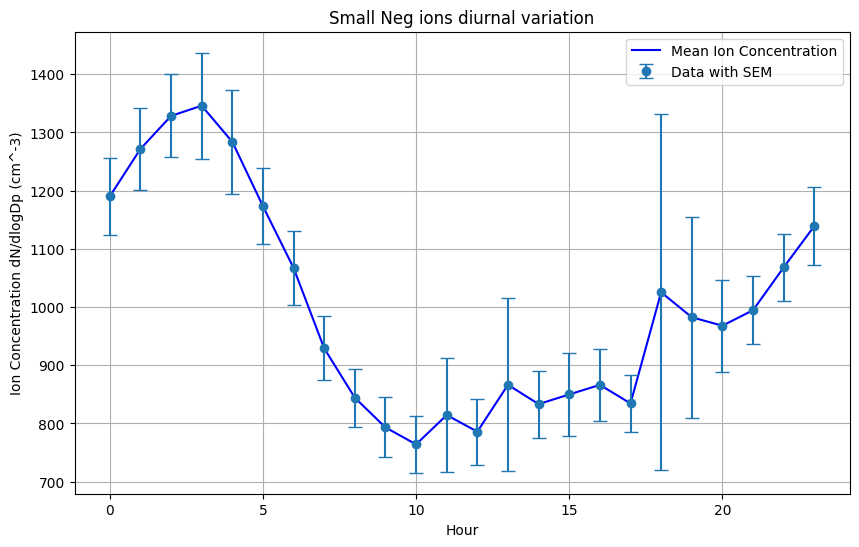

In [29]:
# Plot data
plt.figure(figsize=(10, 6))
plt.plot(small_neg_ions_diurnal_variation['hour'], small_neg_ions_diurnal_variation.values, label='Mean Ion Concentration', color='blue')
plt.errorbar(small_neg_ions_diurnal_variation['hour'], small_neg_ions_diurnal_variation.values, yerr=small_neg_ions_SEM.values, fmt='o', capsize=5, label='Data with SEM')

plt.xlabel('Hour') 
plt.ylabel('Ion Concentration dN/dlogDp (cm^-3)')
#plt.yscale('log')
plt.title('Small Neg Ions diurnal variation')

plt.legend()
plt.grid(True)
plt.show()

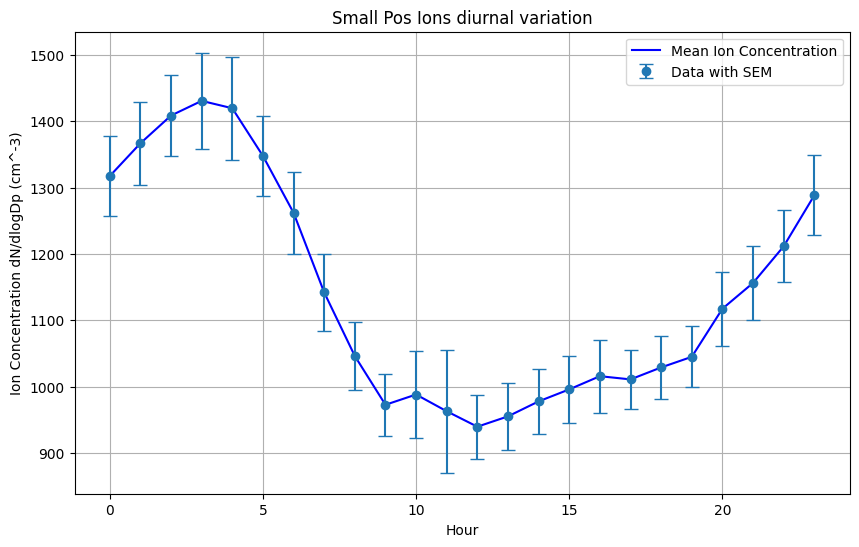

In [30]:
# Plot data
plt.figure(figsize=(10, 6))
plt.plot(small_pos_ions_diurnal_variation['hour'], small_pos_ions_diurnal_variation.values, label='Mean Ion Concentration', color='blue')
plt.errorbar(small_pos_ions_diurnal_variation['hour'], small_pos_ions_diurnal_variation.values, yerr=small_pos_ions_SEM.values, fmt='o', capsize=5, label='Data with SEM')

plt.xlabel('Hour') 
plt.ylabel('Ion Concentration dN/dlogDp (cm^-3)')
plt.title('Small Pos Ions diurnal variation')

plt.legend()
plt.grid(True)
plt.show()

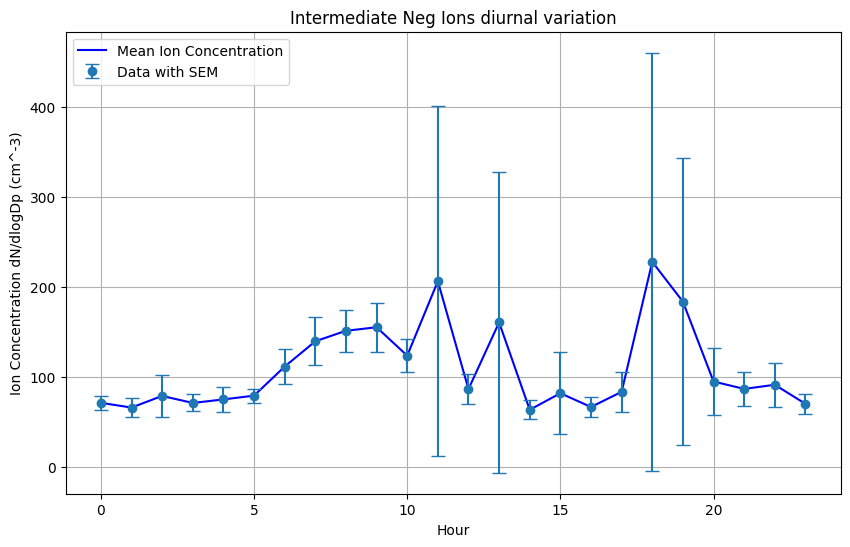

In [31]:
# Plot data
plt.figure(figsize=(10,6))
plt.plot(intermediate_neg_ions_diurnal_variation['hour'], intermediate_neg_ions_diurnal_variation.values, label='Mean Ion Concentration', color='blue')
plt.errorbar(intermediate_neg_ions_diurnal_variation['hour'], intermediate_neg_ions_diurnal_variation.values, yerr=intermediate_neg_ions_SEM.values, fmt='o', capsize=5, label='Data with SEM')

plt.xlabel('Hour') 
plt.ylabel('Ion Concentration dN/dlogDp (cm^-3)')
plt.title('Intermediate Neg Ions diurnal variation')

plt.legend()
plt.grid(True)
plt.show()

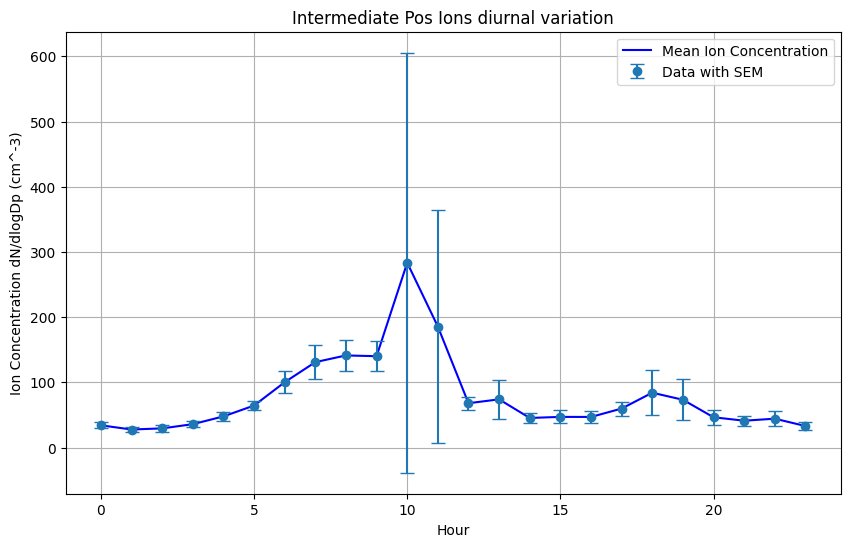

In [32]:
# Plot data
plt.figure(figsize=(10,6))
plt.plot(intermediate_pos_ions_diurnal_variation['hour'], intermediate_pos_ions_diurnal_variation.values, label='Mean Ion Concentration', color='blue')
plt.errorbar(intermediate_pos_ions_diurnal_variation['hour'], intermediate_pos_ions_diurnal_variation.values, yerr=intermediate_pos_ions_SEM.values, fmt='o', capsize=5, label='Data with SEM')

plt.xlabel('Hour') 
plt.ylabel('Ion Concentration dN/dlogDp (cm^-3)')
plt.title('Intermediate Pos Ions diurnal variation')

plt.legend()
plt.grid(True)
plt.show()

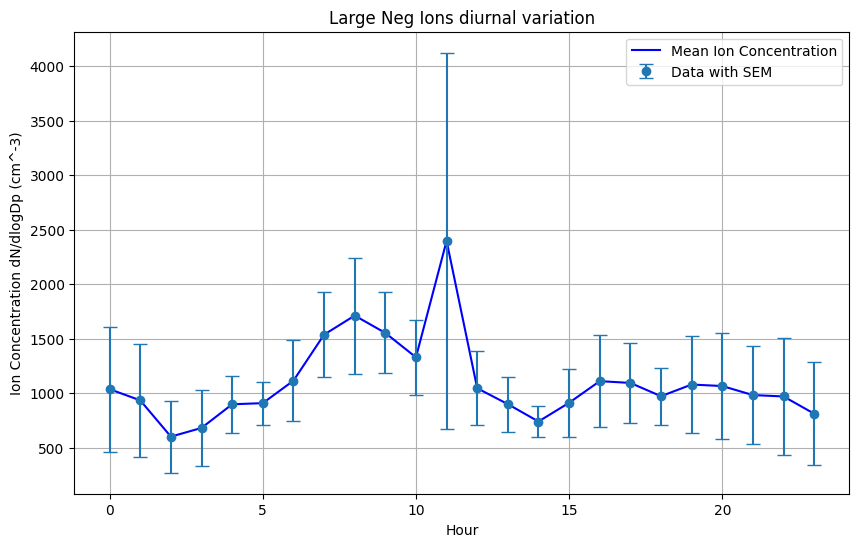

In [33]:
# Plot data
plt.figure(figsize=(10,6))
plt.plot(large_neg_ions_diurnal_variation['hour'], large_neg_ions_diurnal_variation.values, label='Mean Ion Concentration', color='blue')
plt.errorbar(large_neg_ions_diurnal_variation['hour'], large_neg_ions_diurnal_variation.values, yerr=large_neg_ions_SEM.values, fmt='o', capsize=5, label='Data with SEM')

plt.xlabel('Hour') 
plt.ylabel('Ion Concentration dN/dlogDp (cm^-3)')
plplt.plot(large_neg_ions_diurnal_variation['hour'], large_neg_ions_diurnal_variation.values, label='Mean Ion Concentration', color='blue')
plt.errorbar(large_neg_ions_diurnal_variation['hour'], large_neg_ions_diurnal_variation.values, yerr=large_neg_ions_SEM.values, fmt='o', capsize=5, label='Data with SEM')


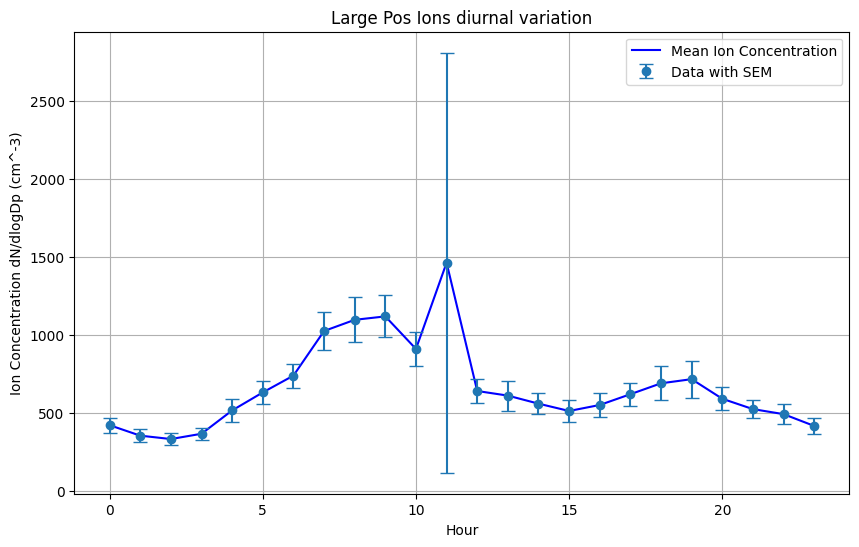

In [34]:
# Plot data
plt.figure(figsize=(10,6))
plt.plot(large_pos_ions_diurnal_variation['hour'], large_pos_ions_diurnal_variation.values, label='Mean Ion Concentration', color='blue')
plt.errorbar(large_pos_ions_diurnal_variation['hour'], large_pos_ions_diurnal_variation.values, yerr=large_pos_ions_SEM.values, fmt='o', capsize=5, label='Data with SEM')

plt.xlabel('Hour') 
plt.ylabel('Ion Concentration dN/dlogDp (cm^-3)')
plt.title('Large Pos Ions diurnal variation')

plt.legend()
plt.grid(True)
plt.show()

### Combine the plots for each polarity

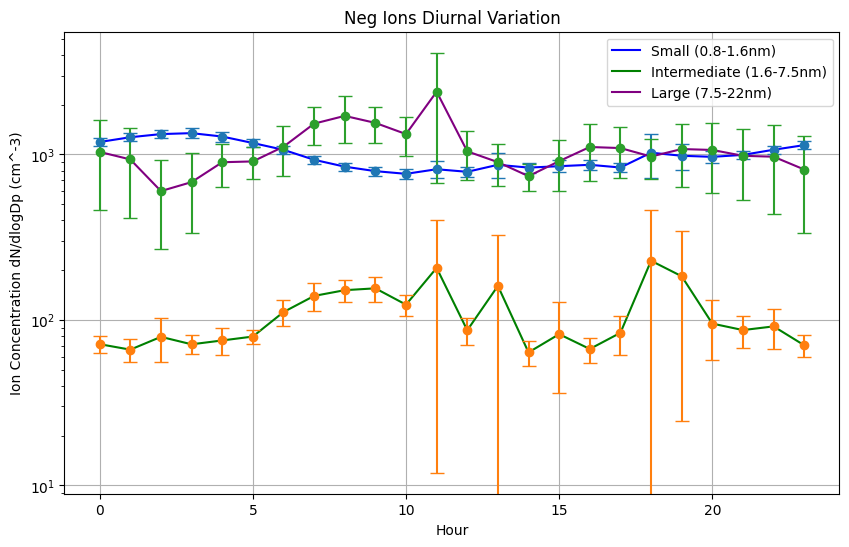

In [35]:
# Plot data
plt.figure(figsize=(10, 6))
plt.plot(small_neg_ions_diurnal_variation['hour'], small_neg_ions_diurnal_variation.values, label='Small (0.8-1.6nm)', color='blue')
plt.errorbar(small_neg_ions_diurnal_variation['hour'], small_neg_ions_diurnal_variation.values, yerr=small_neg_ions_SEM.values, fmt='o', capsize=5)
plt.plot(intermediate_neg_ions_diurnal_variation['hour'], intermediate_neg_ions_diurnal_variation.values, label='Intermediate (1.6-7.5nm)', color='green')
plt.errorbar(intermediate_neg_ions_diurnal_variation['hour'], intermediate_neg_ions_diurnal_variation.values, yerr=intermediate_neg_ions_SEM.values, fmt='o', capsize=5)
plt.plot(large_neg_ions_diurnal_variation['hour'], large_neg_ions_diurnal_variation.values, label='Large (7.5-22nm)', color='purple')
plt.errorbar(large_neg_ions_diurnal_variation['hour'], large_neg_ions_diurnal_variation.values, yerr=large_neg_ions_SEM.values, fmt='o', capsize=5)


plt.xlabel('Hour') 
plt.ylabel('Ion Concentration dN/dlogDp (cm^-3)')
plt.yscale('log')
plt.title('Neg Ions Diurnal Variation')

plt.legend()
plt.grid(True)
plt.show()

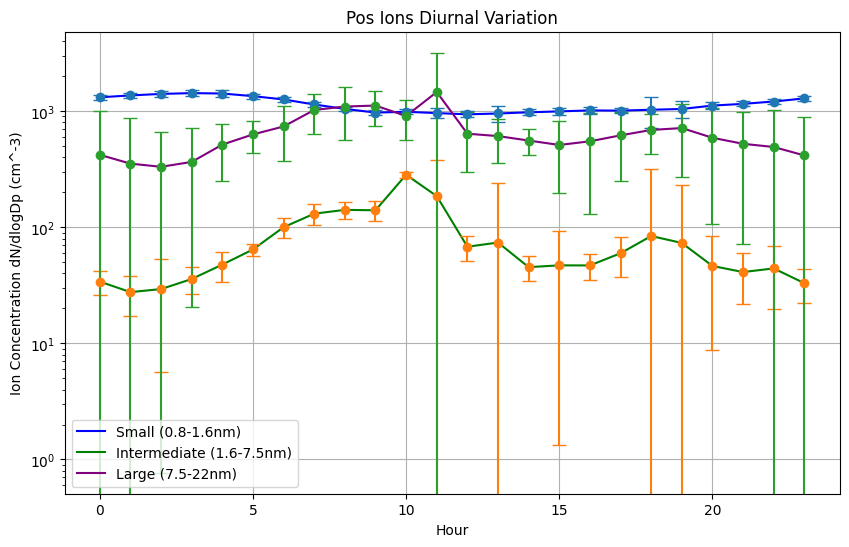

In [36]:
# Plot data
plt.figure(figsize=(10, 6))
plt.plot(small_pos_ions_diurnal_variation['hour'], small_pos_ions_diurnal_variation.values, label='Small (0.8-1.6nm)', color='blue')
plt.errorbar(small_pos_ions_diurnal_variation['hour'], small_pos_ions_diurnal_variation.values, yerr=small_neg_ions_SEM.values, fmt='o', capsize=5)
plt.plot(intermediate_pos_ions_diurnal_variation['hour'], intermediate_pos_ions_diurnal_variation.values, label='Intermediate (1.6-7.5nm)', color='green')
plt.errorbar(intermediate_pos_ions_diurnal_variation['hour'], intermediate_pos_ions_diurnal_variation.values, yerr=intermediate_neg_ions_SEM.values, fmt='o', capsize=5)
plt.plot(large_pos_ions_diurnal_variation['hour'], large_pos_ions_diurnal_variation.values, label='Large (7.5-22nm)', color='purple')
plt.errorbar(large_pos_ions_diurnal_variation['hour'], large_pos_ions_diurnal_variation.values, yerr=large_neg_ions_SEM.values, fmt='o', capsize=5)


plt.xlabel('Hour') 
plt.ylabel('Ion Concentration dN/dlogDp (cm^-3)')
plt.yscale('log')
plt.title('Pos Ions Diurnal Variation')

plt.legend()
plt.grid(True)
plt.show()

### complementary data

In [40]:
# Introduce the complementary data
met1 = pd.read_csv('/home/coliewo/Desktop/DATA/CNR/merged_output.csv')
met2 = pd.read_csv('/home/coliewo/Desktop/DATA/CNR/merged_output2.csv')

# Concatenate along the time axis
complementary = pd.concat([met1, met2])

# Convert the 'datetime' column to a pandas datetime object for time series plotting
complementary['time'] = pd.to_datetime(complementary['datetime'])

# Set 'datetime' as the index for easy plotting of the time series
complementary.set_index('time', inplace=True)

In [38]:
# Convert Mean over each diameter range to a pandas DataFrame
small_neg_i = small_neg_i.to_dataframe().reset_index()
small_neg_i['time'] = pd.to_datetime(small_neg_i['time'])
small_neg_i_df = small_neg_i.set_index('time')

small_pos_i = small_pos_i.to_dataframe().reset_index()
small_pos_i['time'] = pd.to_datetime(small_pos_i['time'])
small_pos_i_df = small_pos_i.set_index('time')

intermediate_neg_i = intermediate_neg_i.to_dataframe().reset_index()
intermediate_neg_i['time'] = pd.to_datetime(intermediate_neg_i['time'])
intermediate_neg_i_df = intermediate_neg_i.set_index('time')

intermediate_pos_i = intermediate_pos_i.to_dataframe().reset_index()
intermediate_pos_i['time'] = pd.to_datetime(intermediate_pos_i['time'])
intermediate_pos_i_df = intermediate_pos_i.set_index('time')

large_neg_i = large_neg_i.to_dataframe().reset_index()
large_neg_i['time'] = pd.to_datetime(large_neg_i['time'])
large_neg_i_df = large_neg_i.set_index('time')

large_pos_i = large_pos_i.to_dataframe().reset_index()
large_pos_i['time'] = pd.to_datetime(large_pos_i['time'])
large_pos_i_df = large_pos_i.set_index('time')

In [41]:
# Merge two datasets on the time index
merge = pd.merge(small_neg_i_df,small_pos_i_df, left_index=True, right_index=True, how='inner')
merge = pd.merge(merge, intermediate_neg_i_df,left_index=True, right_index=True, how='inner')
merge = pd.merge(merge, intermediate_pos_i_df,left_index=True, right_index=True, how='inner')
merge = pd.merge(merge, large_neg_i_df,left_index=True, right_index=True, how='inner')
merge = pd.merge(merge, large_pos_i_df,left_index=True, right_index=True, how='inner')
merge = pd.merge(merge, complementary,left_index=True, right_index=True, how='inner')

In [44]:
bc = pd.read_csv('/home/coliewo/Desktop/DATA/CNR/bc.csv')

# Convert the 'datetime' column to a pandas datetime object for time series plotting
bc['time'] = pd.to_datetime(bc['datetime'])

# Set 'datetime' as the index for easy plotting of the time series
bc.set_index('time', inplace=True)

In [45]:
merge = pd.merge(merge, bc,left_index=True, right_index=True, how='inner')

In [47]:
# Delete a column permanently
merge.drop('datetime_x', axis=1, inplace=True)
merge.drop('datetime_y', axis=1, inplace=True)
merge

,neg_ions_x,pos_ions_x,neg_ions_y,pos_ions_y,neg_ions,pos_ions,O3,NO[ppb],NO2[ppb],NOx[ppb],Radiation_Value,T_air[C],RH[%%],Rain_acc[mm],WD_ave[Deg],WS_ave[m/s],P_air[hPa],BC6[ng/m3]
time,,,,,,,,,,,,,,,,,,
2024-05-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,30.603833,0.381050,3.771833,4.152800,NaN,15.526667,62.461667,0.0,179.801667,2.098333,999.913333,0.000000
2024-05-17 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,36.326500,0.289550,1.886150,2.175767,NaN,15.523333,56.683333,0.0,188.575000,2.535000,1000.101667,0.000000
2024-05-17 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,24.098167,0.744033,5.283217,6.027283,NaN,13.991667,65.050000,0.0,262.573333,1.373333,1000.328333,0.000000
2024-05-17 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,13.549067,0.838600,8.800683,9.639333,NaN,12.990000,71.723333,0.0,197.376667,1.085000,1000.661667,0.000000
2024-05-17 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,12.092483,2.276083,9.312900,11.588967,NaN,13.040000,71.758333,0.0,228.896667,0.848333,1001.240000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-29 20:00:00,593.124935,750.261536,40.879078,14.353804,565.558560,591.877296,2.274348,4.866417,11.128383,15.994817,0.0,15.796667,82.545000,0.0,197.340000,1.715000,1018.273333,3665.400000
2024-10-29 21:00:00,620.952649,767.277032,28.811610,14.618607,433.070727,432.316571,4.929400,0.970800,8.362117,9.333050,0.0,15.453333,82.710000,0.0,201.998333,1.855000,1018.225000,3515.616667
2024-10-29 22:00:00,702.205690,829.292619,31.349935,12.216645,346.756071,327.384468,5.381717,0.385117,7.030700,7.415800,0.0,15.200000,82.795000,0.0,201.301667,1.850000,1018.150000,2537.033333


In [49]:
# Rename specific columns
merge.rename(columns={'neg_ions': 'neg_small', 
                      'pos_ions': 'pos_small',
                      'neg_ions_x': 'neg_intermediate',
                      'pos_ions_x': 'pos_intermediate',
                      'neg_ions_y': 'neg_large',
                      'pos_ions_y': 'pos_large'}, inplace=True)

merge


,neg_intermediate,pos_intermediate,neg_large,pos_large,neg_small,pos_small,O3,NO[ppb],NO2[ppb],NOx[ppb],Radiation_Value,T_air[C],RH[%%],Rain_acc[mm],WD_ave[Deg],WS_ave[m/s],P_air[hPa],BC6[ng/m3]
time,,,,,,,,,,,,,,,,,,
2024-05-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,30.603833,0.381050,3.771833,4.152800,NaN,15.526667,62.461667,0.0,179.801667,2.098333,999.913333,0.000000
2024-05-17 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,36.326500,0.289550,1.886150,2.175767,NaN,15.523333,56.683333,0.0,188.575000,2.535000,1000.101667,0.000000
2024-05-17 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,24.098167,0.744033,5.283217,6.027283,NaN,13.991667,65.050000,0.0,262.573333,1.373333,1000.328333,0.000000
2024-05-17 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,13.549067,0.838600,8.800683,9.639333,NaN,12.990000,71.723333,0.0,197.376667,1.085000,1000.661667,0.000000
2024-05-17 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,12.092483,2.276083,9.312900,11.588967,NaN,13.040000,71.758333,0.0,228.896667,0.848333,1001.240000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-29 20:00:00,593.124935,750.261536,40.879078,14.353804,565.558560,591.877296,2.274348,4.866417,11.128383,15.994817,0.0,15.796667,82.545000,0.0,197.340000,1.715000,1018.273333,3665.400000
2024-10-29 21:00:00,620.952649,767.277032,28.811610,14.618607,433.070727,432.316571,4.929400,0.970800,8.362117,9.333050,0.0,15.453333,82.710000,0.0,201.998333,1.855000,1018.225000,3515.616667
2024-10-29 22:00:00,702.205690,829.292619,31.349935,12.216645,346.756071,327.384468,5.381717,0.385117,7.030700,7.415800,0.0,15.200000,82.795000,0.0,201.301667,1.850000,1018.150000,2537.033333


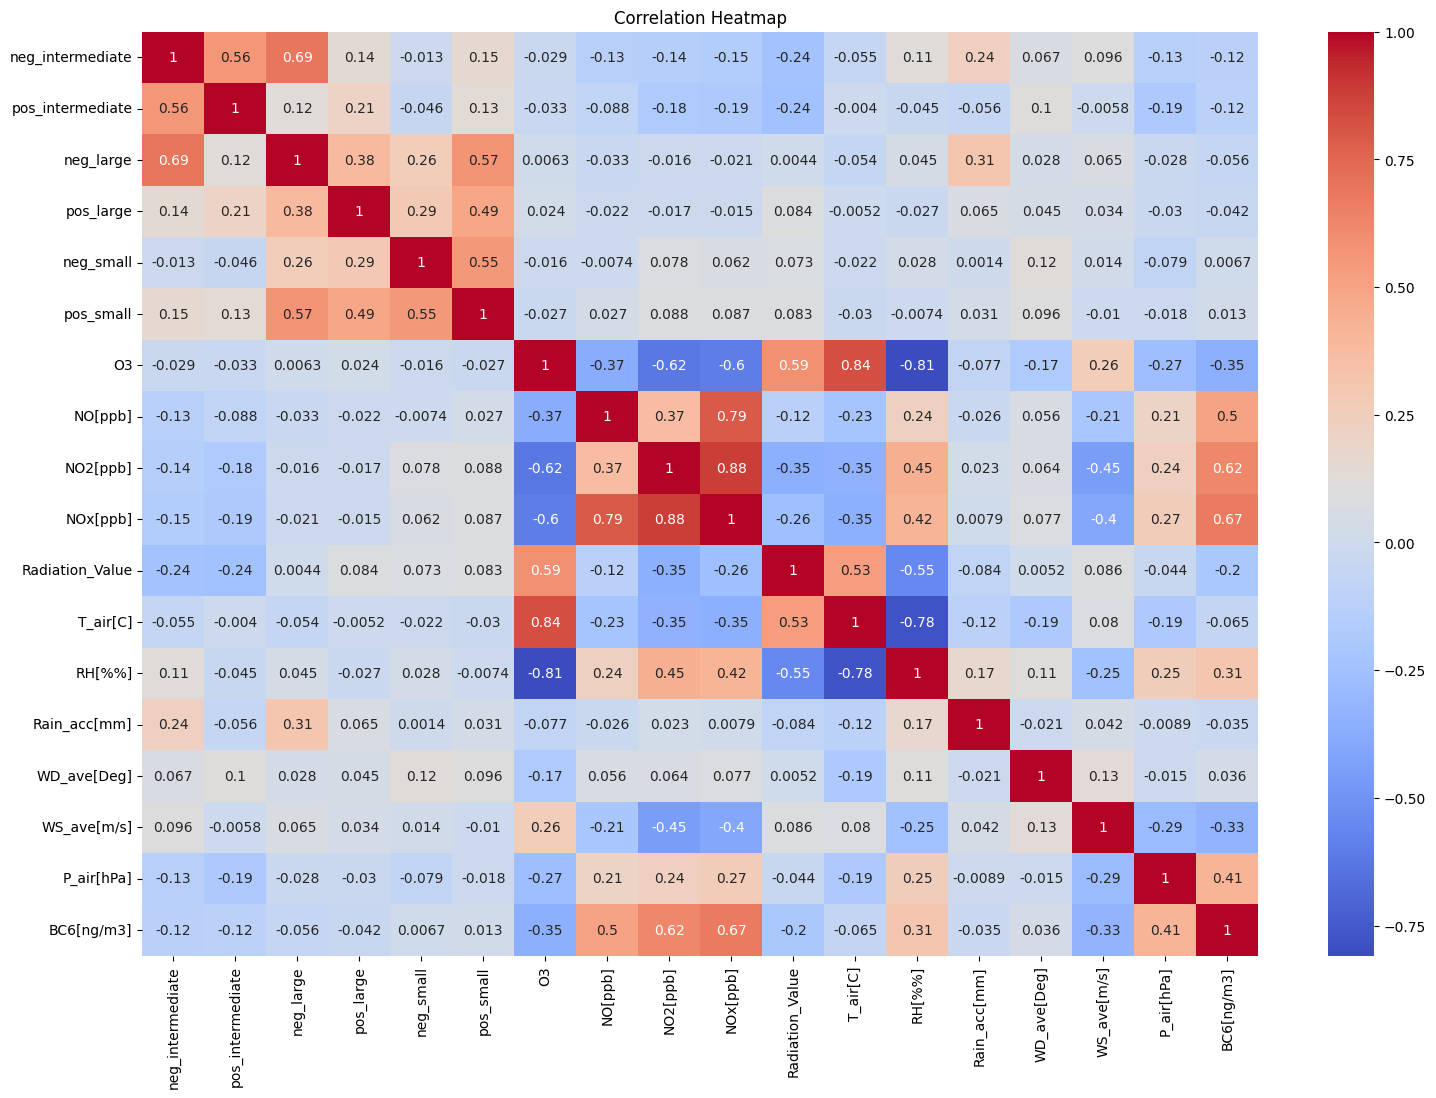

In [51]:
# Correlation Heatmap
import seaborn as sns

plt.figure(figsize=(18, 12))
sns.heatmap(merge.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Divide the data now
### Using the groups from the previous mode fitting
But there were 6 groups, how do i incorporate all of them????

Use group 1 as NPF event days, Groups 2+3 as undefined, groups 4+5 as non events, ignore group 6 as outlier (it's anyway one day)

In [52]:
npf_days=('2024-05-18', '2024-05-24', '2024-05-30', '2024-05-31',
               '2024-06-01', '2024-06-04', '2024-06-05', '2024-06-06',
               '2024-06-10', '2024-06-17', '2024-06-18', '2024-06-25',
               '2024-06-28', '2024-07-02', '2024-07-10', '2024-07-11',
               '2024-07-14', '2024-07-15', '2024-07-16', '2024-07-17',
               '2024-07-18', '2024-07-19', '2024-07-20', '2024-07-24',
               '2024-07-25', '2024-07-31', '2024-09-13', '2024-09-14',
               '2024-09-15', '2024-09-16', '2024-09-17', '2024-09-29',
               '2024-10-23')
undef = ('2024-05-21', '2024-05-22', '2024-05-23', '2024-05-26',
               '2024-05-27', '2024-06-02', '2024-06-03', '2024-06-08',
               '2024-06-12', '2024-06-19', '2024-06-22', '2024-06-24',
               '2024-06-26', '2024-07-01', '2024-07-03', '2024-07-05',
               '2024-07-08', '2024-07-09', '2024-07-12', '2024-07-26',
               '2024-07-28', '2024-08-04', '2024-08-05', '2024-08-06',
               '2024-08-08', '2024-08-12', '2024-08-14', '2024-08-17',
               '2024-08-19', '2024-08-25', '2024-08-28', '2024-08-29',
               '2024-08-30', '2024-09-01', '2024-09-02', '2024-09-03',
               '2024-09-04', '2024-09-07', '2024-09-12', '2024-09-18',
               '2024-09-20', '2024-09-25', '2024-09-28', '2024-10-01',
               '2024-10-03', '2024-10-10', '2024-10-13', '2024-05-28', '2024-05-29', '2024-06-07', '2024-06-09',
               '2024-06-16', '2024-06-20', '2024-06-27', '2024-07-04',
               '2024-07-13', '2024-07-22', '2024-07-23', '2024-07-27',
               '2024-07-30', '2024-08-07', '2024-08-09', '2024-08-10',
               '2024-08-13', '2024-08-15', '2024-08-16', '2024-08-18',
               '2024-08-21', '2024-08-23', '2024-08-24', '2024-08-27',
               '2024-08-31', '2024-09-05', '2024-09-08', '2024-09-09',
               '2024-09-10', '2024-09-19', '2024-09-24', '2024-09-26',
               '2024-09-30', '2024-10-02', '2024-10-04', '2024-10-05',
               '2024-10-06', '2024-10-08', '2024-10-09', '2024-10-14',
               '2024-10-18', '2024-10-20', '2024-10-24', '2024-10-25',
               '2024-10-26')
nonevent = ('2024-05-19', '2024-05-25', '2024-06-14', '2024-06-23',
               '2024-07-06', '2024-07-21', '2024-07-29', '2024-08-01',
               '2024-08-03', '2024-08-11', '2024-08-20', '2024-08-22',
               '2024-08-26', '2024-09-11', '2024-09-22', '2024-09-23',
               '2024-09-27', '2024-10-07', '2024-10-11', '2024-10-12',
               '2024-10-15', '2024-10-16', '2024-10-19', '2024-10-21',
               '2024-10-28', '2024-10-29', '2024-06-15', '2024-06-21', '2024-06-29', '2024-06-30',
               '2024-09-21', '2024-10-17', '2024-10-22', '2024-10-27')

In [53]:
# dates from the days data (ignoring the time part)
unique_dates0 = pd.to_datetime(npf_days).normalize()
unique_dates1 = pd.to_datetime(undef).normalize()
unique_dates2 = pd.to_datetime(nonevent).normalize()

In [54]:
# Filter data for the selected dates for each 
df_npf = merge[merge.index.floor('D').isin(unique_dates0)]
df_undef = merge[merge.index.floor('D').isin(unique_dates1)]
df_nonevent = merge[merge.index.floor('D').isin(unique_dates2)]

In [56]:
# Compute mean diurnal cycle for temp
npf_tmean_diurnal = df_npf.groupby(df_npf.index.hour)['T_air[C]'].mean()
undef_tmean_diurnal = df_undef.groupby(df_undef.index.hour)['T_air[C]'].mean()
nonevent_tmean_diurnal = df_nonevent.groupby(df_nonevent.index.hour)['T_air[C]'].mean()

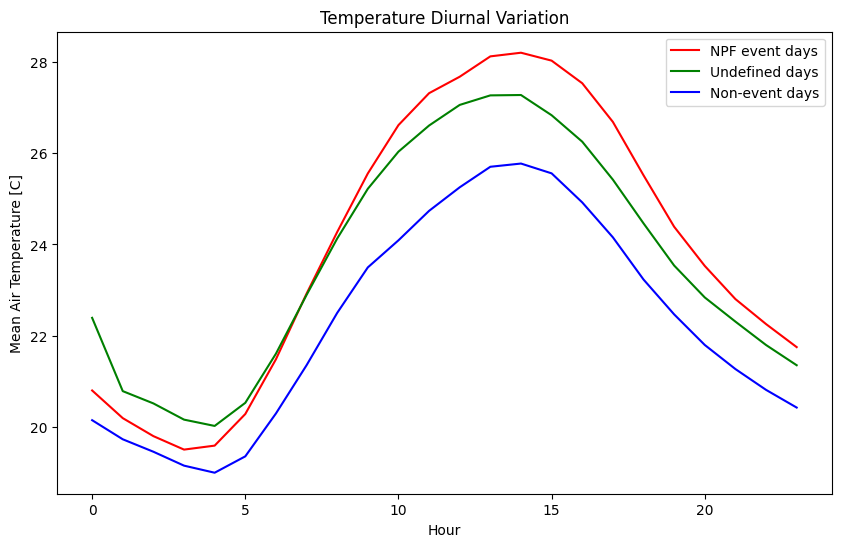

In [57]:
# Plotting all the curves simultaneously 
plt.figure(figsize=(10,6))
plt.plot(npf_tmean_diurnal.index, npf_tmean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_tmean_diurnal.index, undef_tmean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_tmean_diurnal.index, nonevent_tmean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean Air Temperature [C]')
plt.title('Temperature Diurnal Variation')

plt.legend()
plt.show()

In [58]:
# Compute mean diurnal cycle for Relative Humidity
npf_rhmean_diurnal = df_npf.groupby(df_npf.index.hour)['RH[%%]'].mean()
undef_rhmean_diurnal = df_undef.groupby(df_undef.index.hour)['RH[%%]'].mean()
nonevent_rhmean_diurnal = df_nonevent.groupby(df_nonevent.index.hour)['RH[%%]'].mean()

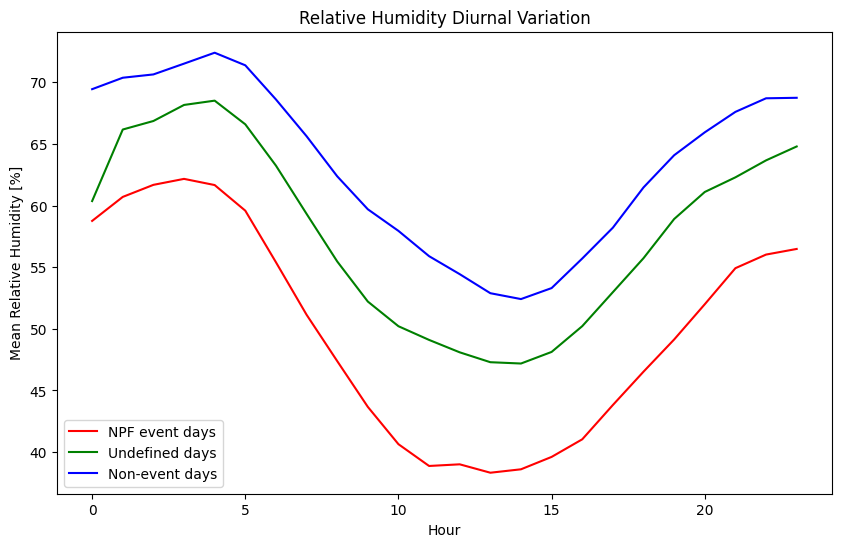

In [59]:
# Plotting all the curves simultaneously 
plt.figure(figsize=(10,6))
plt.plot(npf_rhmean_diurnal.index, npf_rhmean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_rhmean_diurnal.index, undef_rhmean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_rhmean_diurnal.index, nonevent_rhmean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean Relative Humidity [%]')
plt.title('Relative Humidity Diurnal Variation')

plt.legend()
plt.show()

In [60]:
# Compute mean diurnal cycle for Wind speed
npf_wsmean_diurnal = df_npf.groupby(df_npf.index.hour)['WS_ave[m/s]'].mean()
undef_wsmean_diurnal = df_undef.groupby(df_undef.index.hour)['WS_ave[m/s]'].mean()
nonevent_wsmean_diurnal = df_nonevent.groupby(df_nonevent.index.hour)['WS_ave[m/s]'].mean()

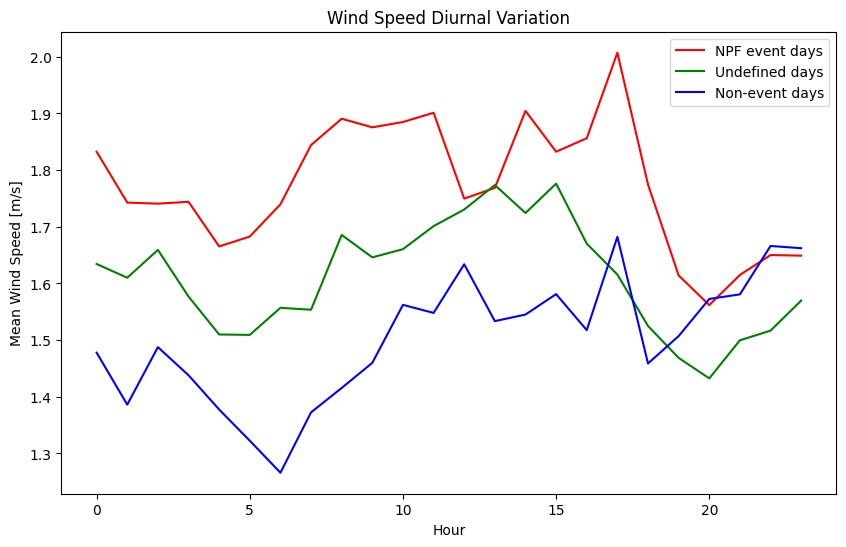

In [61]:
# Plotting all the curves simultaneously 
plt.figure(figsize=(10,6))
plt.plot(npf_wsmean_diurnal.index, npf_wsmean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_wsmean_diurnal.index, undef_wsmean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_wsmean_diurnal.index, nonevent_wsmean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean Wind Speed [m/s]')
plt.title('Wind Speed Diurnal Variation')

plt.legend()
plt.show()

In [62]:
# Compute mean diurnal cycle for Wind direction
npf_wdmean_diurnal = df_npf.groupby(df_npf.index.hour)['WD_ave[Deg]'].mean()
undef_wdmean_diurnal = df_undef.groupby(df_undef.index.hour)['WD_ave[Deg]'].mean()
nonevent_wdmean_diurnal = df_nonevent.groupby(df_nonevent.index.hour)['WD_ave[Deg]'].mean()

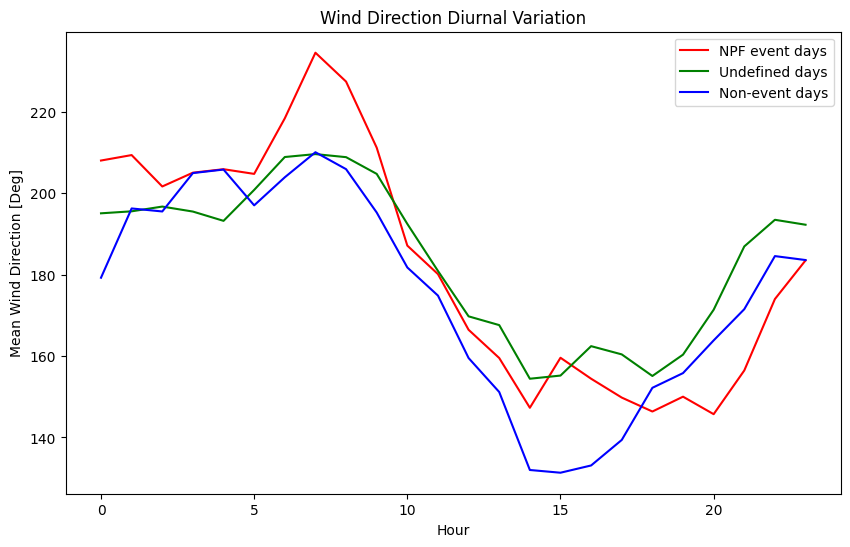

In [63]:
# Plotting all the curves simultaneously 
plt.figure(figsize=(10,6))
plt.plot(npf_wdmean_diurnal.index, npf_wdmean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_wdmean_diurnal.index, undef_wdmean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_wdmean_diurnal.index, nonevent_wdmean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean Wind Direction [Deg]')
plt.title('Wind Direction Diurnal Variation')

plt.legend()
plt.show()

In [64]:
# Compute mean diurnal cycle for Air pressure
npf_pmean_diurnal = df_npf.groupby(df_npf.index.hour)['P_air[hPa]'].mean()
undef_pmean_diurnal = df_undef.groupby(df_undef.index.hour)['P_air[hPa]'].mean()
nonevent_pmean_diurnal = df_nonevent.groupby(df_nonevent.index.hour)['P_air[hPa]'].mean()

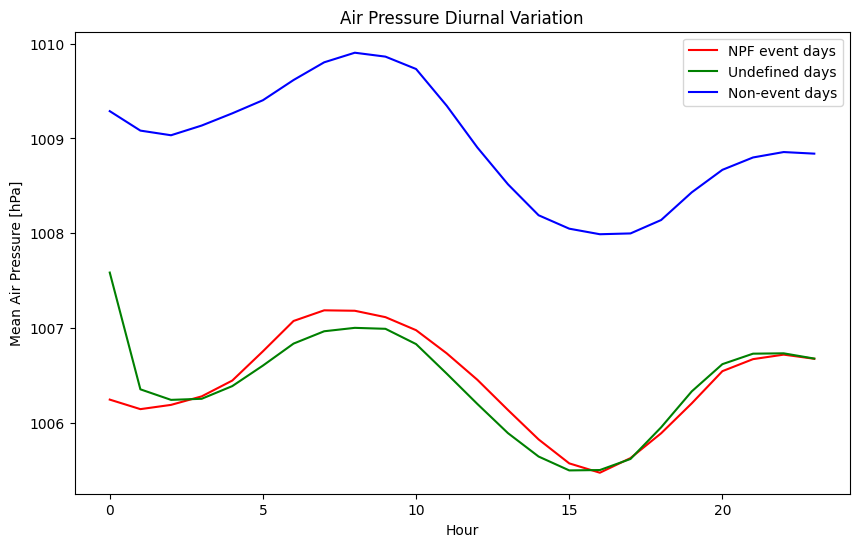

In [65]:
# Plotting all the curves simultaneously 
plt.figure(figsize=(10,6))
plt.plot(npf_pmean_diurnal.index, npf_pmean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_pmean_diurnal.index, undef_pmean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_pmean_diurnal.index, nonevent_pmean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean Air Pressure [hPa]')
plt.title('Air Pressure Diurnal Variation')

plt.legend()
plt.show()

In [66]:
# Compute mean diurnal cycle for Solar radiation
npf_radmean_diurnal = df_npf.groupby(df_npf.index.hour)['Radiation_Value'].mean()
undef_radmean_diurnal = df_undef.groupby(df_undef.index.hour)['Radiation_Value'].mean()
nonevent_radmean_diurnal = df_nonevent.groupby(df_nonevent.index.hour)['Radiation_Value'].mean()

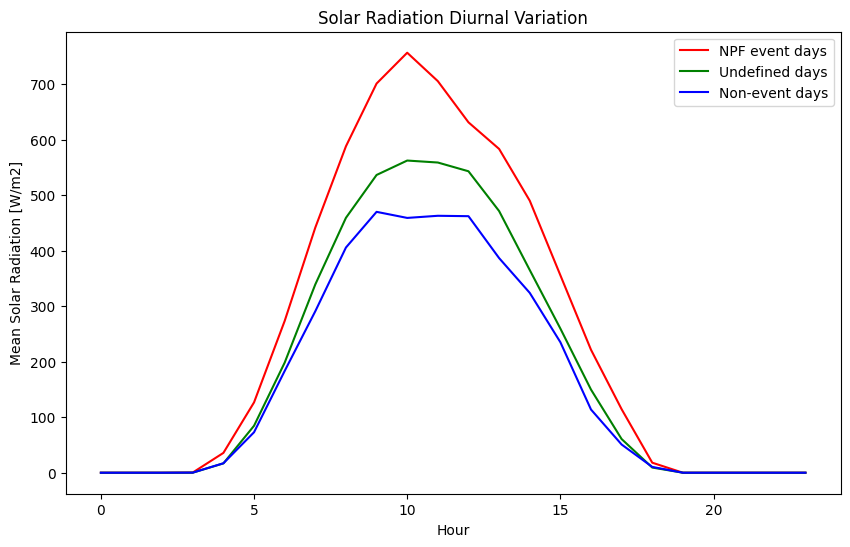

In [67]:
# Plotting all the curves simultaneously 
plt.figure(figsize=(10,6))
plt.plot(npf_radmean_diurnal.index, npf_radmean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_radmean_diurnal.index, undef_radmean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_radmean_diurnal.index, nonevent_radmean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean Solar Radiation [W/m2]')
plt.title('Solar Radiation Diurnal Variation')

plt.legend()
plt.show()

In [68]:
# Compute mean diurnal cycle for NO
npf_nomean_diurnal = df_npf.groupby(df_npf.index.hour)['NO[ppb]'].mean()
undef_nomean_diurnal = df_undef.groupby(df_undef.index.hour)['NO[ppb]'].mean()
nonevent_nomean_diurnal = df_nonevent.groupby(df_nonevent.index.hour)['NO[ppb]'].mean()

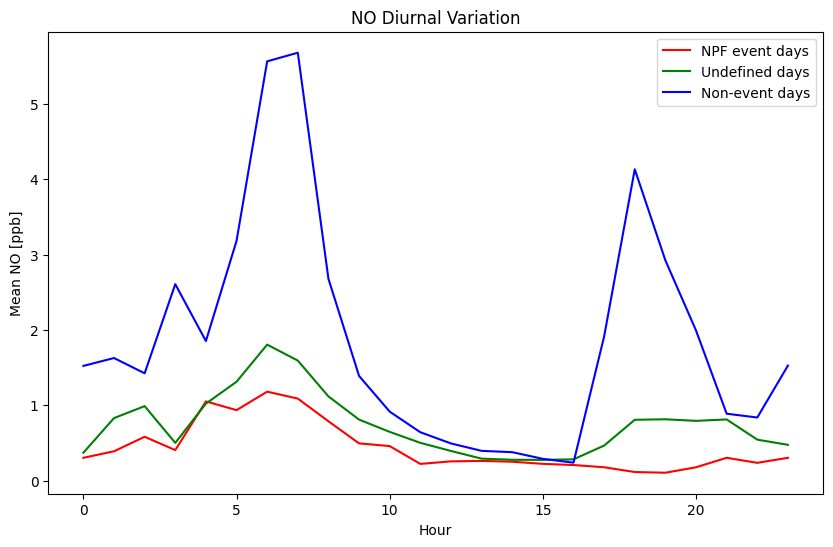

In [69]:
# Plotting all the curves simultaneously 
plt.figure(figsize=(10,6))
plt.plot(npf_nomean_diurnal.index, npf_nomean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_nomean_diurnal.index, undef_nomean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_nomean_diurnal.index, nonevent_nomean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean NO [ppb]')
plt.title('NO Diurnal Variation')

plt.legend()
plt.show()

In [70]:
# Compute mean diurnal cycle for NO2
npf_no2mean_diurnal = df_npf.groupby(df_npf.index.hour)['NO2[ppb]'].mean()
undef_no2mean_diurnal = df_undef.groupby(df_undef.index.hour)['NO2[ppb]'].mean()
nonevent_no2mean_diurnal = df_nonevent.groupby(df_nonevent.index.hour)['NO2[ppb]'].mean()

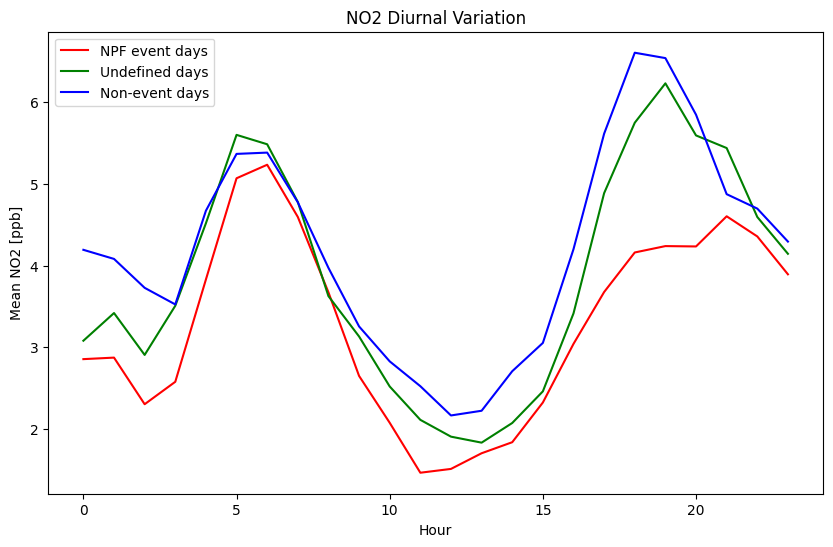

In [71]:
# Plotting all the curves simultaneously 
plt.figure(figsize=(10,6))
plt.plot(npf_no2mean_diurnal.index, npf_no2mean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_no2mean_diurnal.index, undef_no2mean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_no2mean_diurnal.index, nonevent_no2mean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean NO2 [ppb]')
plt.title('NO2 Diurnal Variation')

plt.legend()
plt.show()

In [72]:
# Compute mean diurnal cycle for NOx
npf_noxmean_diurnal = df_npf.groupby(df_npf.index.hour)['NOx[ppb]'].mean()
undef_noxmean_diurnal = df_undef.groupby(df_undef.index.hour)['NOx[ppb]'].mean()
nonevent_noxmean_diurnal = df_nonevent.groupby(df_nonevent.index.hour)['NOx[ppb]'].mean()

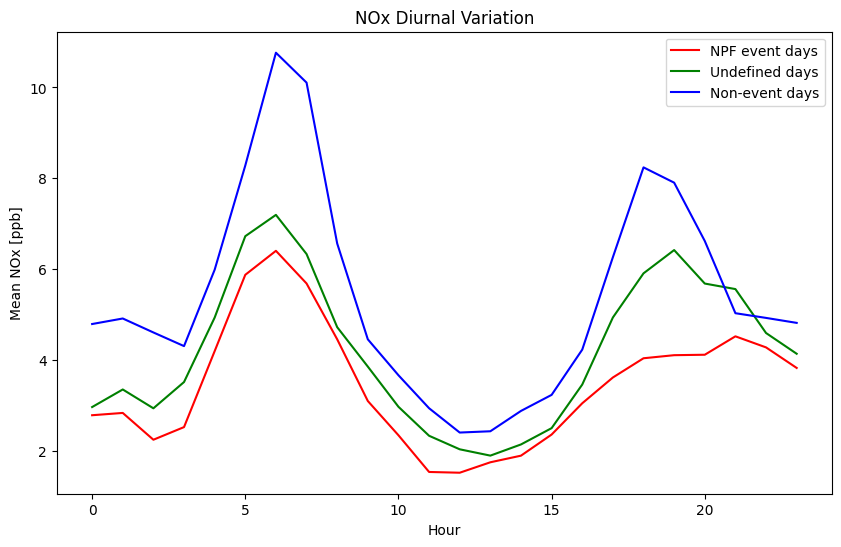

In [73]:
# Plotting all the curves simultaneously 
plt.figure(figsize=(10,6))
plt.plot(npf_noxmean_diurnal.index, npf_noxmean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_noxmean_diurnal.index, undef_noxmean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_noxmean_diurnal.index, nonevent_noxmean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean NOx [ppb]')
plt.title('NOx Diurnal Variation')

plt.legend()
plt.show()

In [74]:
# Compute mean diurnal cycle for ozone
npf_o3mean_diurnal = df_npf.groupby(df_npf.index.hour)['O3'].mean()
undef_o3mean_diurnal = df_undef.groupby(df_undef.index.hour)['O3'].mean()
nonevent_o3mean_diurnal = df_nonevent.groupby(df_nonevent.index.hour)['O3'].mean()

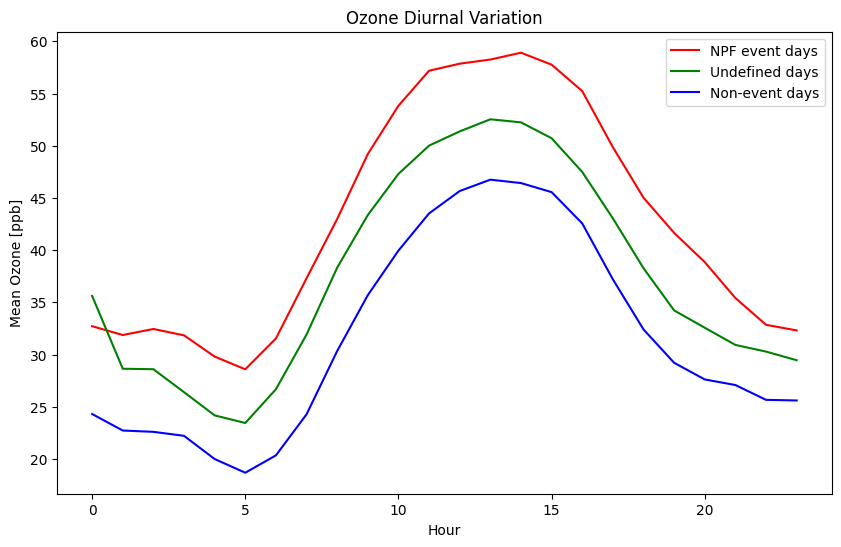

In [75]:
# Plotting all the curves simultaneously 
plt.figure(figsize=(10,6))
plt.plot(npf_o3mean_diurnal.index, npf_o3mean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_o3mean_diurnal.index, undef_o3mean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_o3mean_diurnal.index, nonevent_o3mean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean Ozone [ppb]')
plt.title('Ozone Diurnal Variation')

plt.legend()
plt.show()

In [76]:
# Compute mean diurnal cycle for black carbon
npf_bcmean_diurnal = df_npf.groupby(df_npf.index.hour)['BC6[ng/m3]'].mean()
undef_bcmean_diurnal = df_undef.groupby(df_undef.index.hour)['BC6[ng/m3]'].mean()
nonevent_bcmean_diurnal = df_nonevent.groupby(df_nonevent.index.hour)['BC6[ng/m3]'].mean()

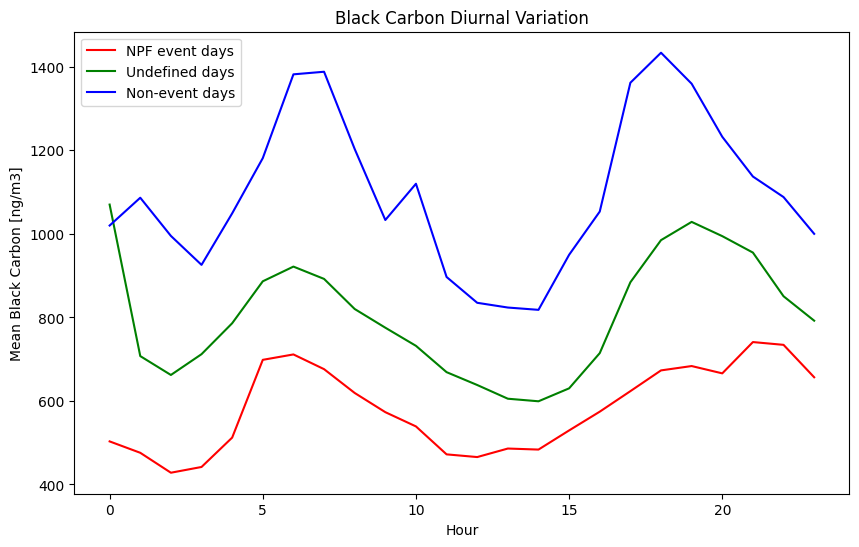

In [77]:
# Plotting all the curves simultaneously 
plt.figure(figsize=(10,6))
plt.plot(npf_bcmean_diurnal.index, npf_bcmean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_bcmean_diurnal.index, undef_bcmean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_bcmean_diurnal.index, nonevent_bcmean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean Black Carbon [ng/m3]')
plt.title('Black Carbon Diurnal Variation')

plt.legend()
plt.show()

In [78]:
# Compute mean diurnal cycle for small neg ions
npf_snmean_diurnal = df_npf.groupby(df_npf.index.hour)['neg_small'].mean()
undef_snmean_diurnal = df_undef.groupby(df_undef.index.hour)['neg_small'].mean()
nonevent_snmean_diurnal = df_nonevent.groupby(df_nonevent.index.hour)['neg_small'].mean()

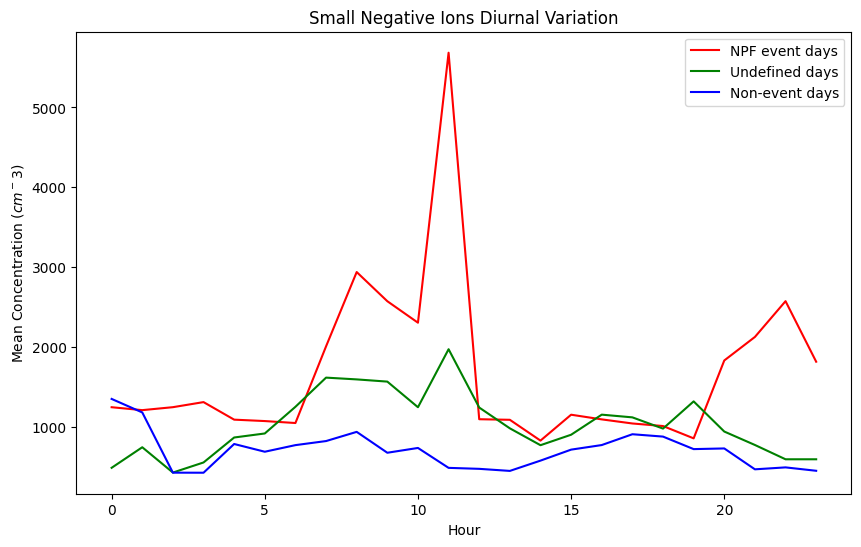

In [79]:
# Plotting all the curves simultaneously 
plt.figure(figsize=(10,6))
plt.plot(npf_snmean_diurnal.index, npf_snmean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_snmean_diurnal.index, undef_snmean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_snmean_diurnal.index, nonevent_snmean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean Concentration ($cm^-3$)')
plt.title('Small Negative Ions Diurnal Variation')

plt.legend()
plt.show()

In [80]:
# Compute mean diurnal cycle for small pos ions
npf_spmean_diurnal = df_npf.groupby(df_npf.index.hour)['pos_small'].mean()
undef_spmean_diurnal = df_undef.groupby(df_undef.index.hour)['pos_small'].mean()
nonevent_spmean_diurnal = df_nonevent.groupby(df_nonevent.index.hour)['pos_small'].mean()

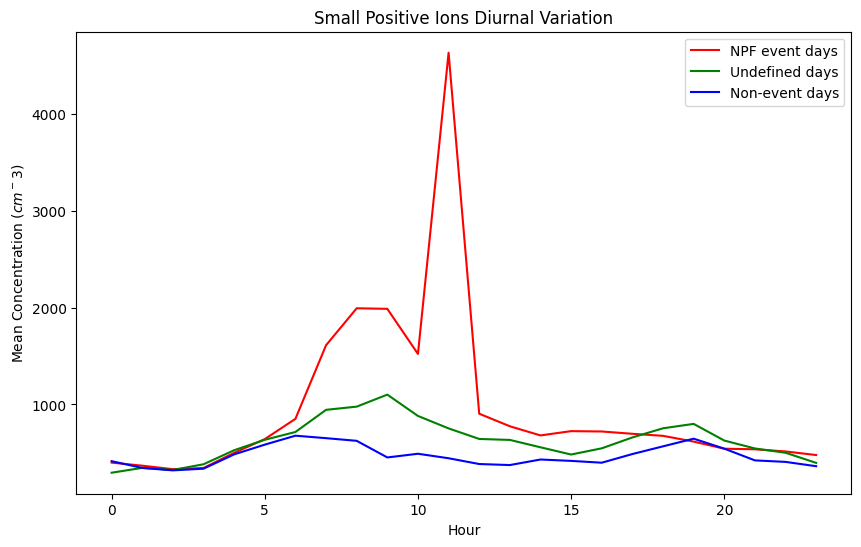

In [81]:
# Plotting all the curves simultaneously 
plt.figure(figsize=(10,6))
plt.plot(npf_spmean_diurnal.index, npf_spmean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_spmean_diurnal.index, undef_spmean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_spmean_diurnal.index, nonevent_spmean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean Concentration ($cm^-3$)')
plt.title('Small Positive Ions Diurnal Variation')

plt.legend()
plt.show()

In [82]:
# Compute mean diurnal cycle for intermediate neg ions
npf_inmean_diurnal = df_npf.groupby(df_npf.index.hour)['neg_intermediate'].mean()
undef_inmean_diurnal = df_undef.groupby(df_undef.index.hour)['neg_intermediate'].mean()
nonevent_inmean_diurnal = df_nonevent.groupby(df_nonevent.index.hour)['neg_intermediate'].mean()

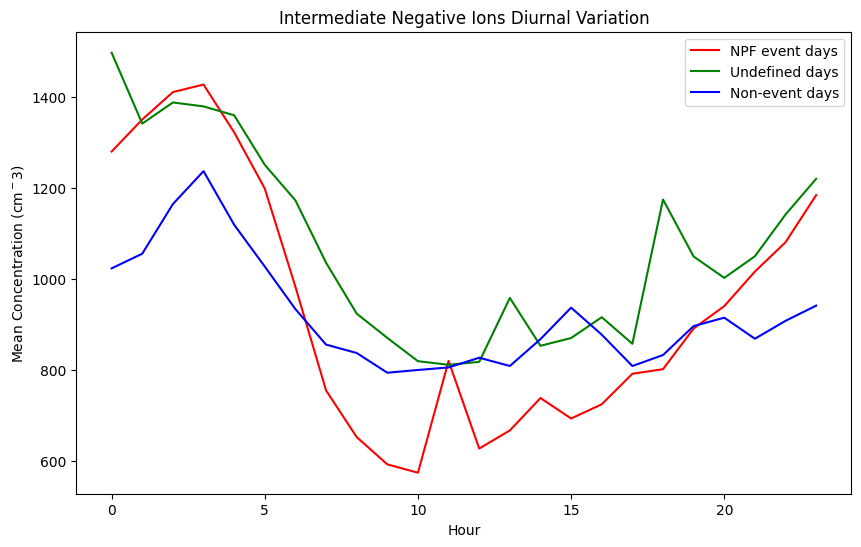

In [83]:
# Plotting all the curves simultaneously 
plt.figure(figsize=(10,6))
plt.plot(npf_inmean_diurnal.index, npf_inmean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_inmean_diurnal.index, undef_inmean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_inmean_diurnal.index, nonevent_inmean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean Concentration (cm$^-3$)')
plt.title('Intermediate Negative Ions Diurnal Variation')

plt.legend()
plt.show()

In [84]:
# Compute mean diurnal cycle for intermediate pos ions
npf_ipmean_diurnal = df_npf.groupby(df_npf.index.hour)['pos_intermediate'].mean()
undef_ipmean_diurnal = df_undef.groupby(df_undef.index.hour)['pos_intermediate'].mean()
nonevent_ipmean_diurnal = df_nonevent.groupby(df_nonevent.index.hour)['pos_intermediate'].mean()

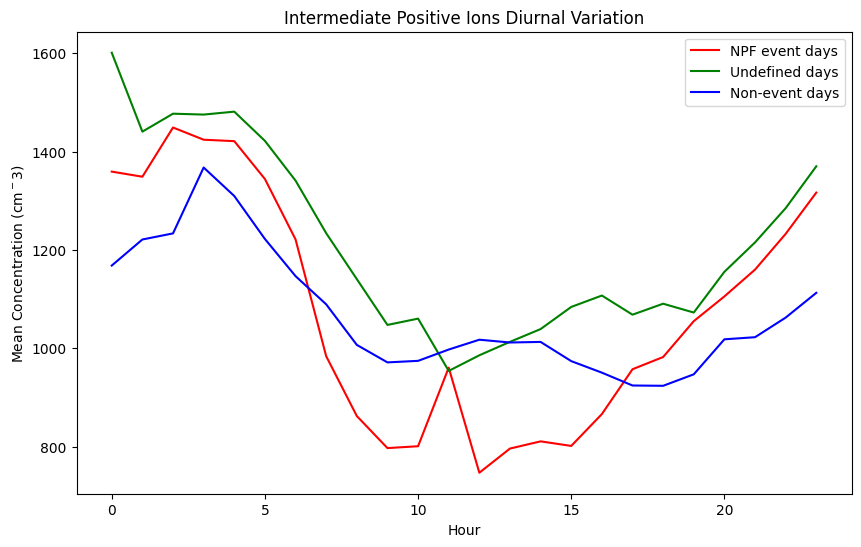

In [85]:
# Plotting all the curves simultaneously 
plt.figure(figsize=(10,6))
plt.plot(npf_ipmean_diurnal.index, npf_ipmean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_ipmean_diurnal.index, undef_ipmean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_ipmean_diurnal.index, nonevent_ipmean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean Concentration (cm$^-3$)')
plt.title('Intermediate Positive Ions Diurnal Variation')

plt.legend()
plt.show()

In [86]:
# Compute mean diurnal cycle for large neg ions
npf_lnmean_diurnal = df_npf.groupby(df_npf.index.hour)['neg_large'].mean()
undef_lnmean_diurnal = df_undef.groupby(df_undef.index.hour)['neg_large'].mean()
nonevent_lnmean_diurnal = df_nonevent.groupby(df_nonevent.index.hour)['neg_large'].mean()

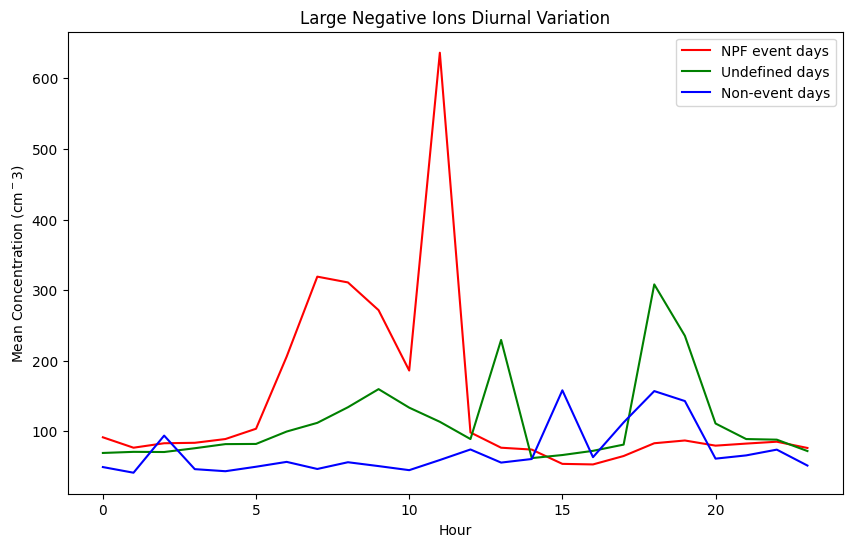

In [87]:
# Plotting all the curves simultaneously 
plt.figure(figsize=(10,6))
plt.plot(npf_lnmean_diurnal.index, npf_lnmean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_lnmean_diurnal.index, undef_lnmean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_lnmean_diurnal.index, nonevent_lnmean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean Concentration (cm$^-3$)')
plt.title('Large Negative Ions Diurnal Variation')

plt.legend()
plt.show()

In [88]:
# Compute mean diurnal cycle for large pos ions
npf_lpmean_diurnal = df_npf.groupby(df_npf.index.hour)['pos_large'].mean()
undef_lpmean_diurnal = df_undef.groupby(df_undef.index.hour)['pos_large'].mean()
nonevent_lpmean_diurnal = df_nonevent.groupby(df_nonevent.index.hour)['pos_large'].mean()

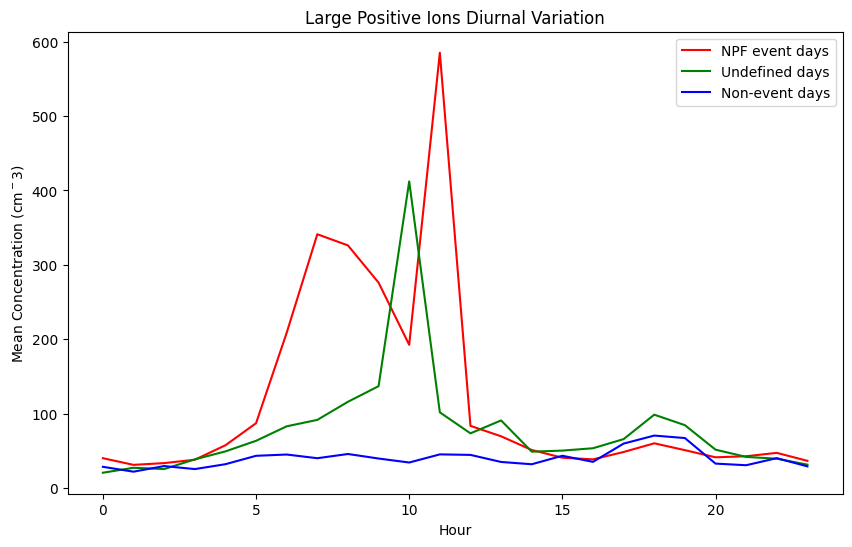

In [89]:
# Plotting all the curves simultaneously 
plt.figure(figsize=(10,6))
plt.plot(npf_lpmean_diurnal.index, npf_lpmean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_lpmean_diurnal.index, undef_lpmean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_lpmean_diurnal.index, nonevent_lpmean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean Concentration (cm$^-3$)')
plt.title('Large Positive Ions Diurnal Variation')

plt.legend()
plt.show()

### Try summing them ie, small (pos+neg)

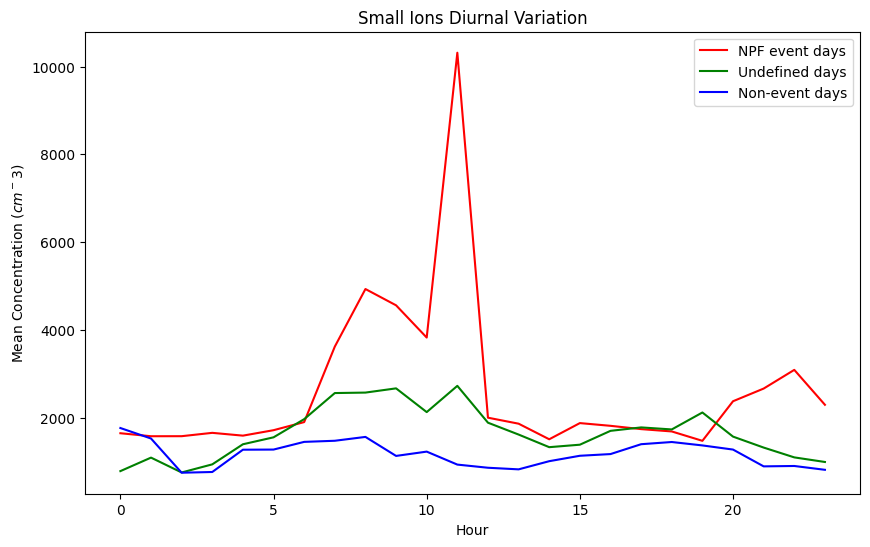

In [90]:
# Plotting all the curves simultaneously 
plt.figure(figsize=(10,6))
plt.plot(npf_spmean_diurnal.index, npf_spmean_diurnal+npf_snmean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_spmean_diurnal.index, undef_spmean_diurnal+undef_snmean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_spmean_diurnal.index, nonevent_spmean_diurnal+nonevent_snmean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean Concentration (cm$^-3$)')
plt.title('Small Ions Diurnal Variation')

plt.legend()
plt.show()

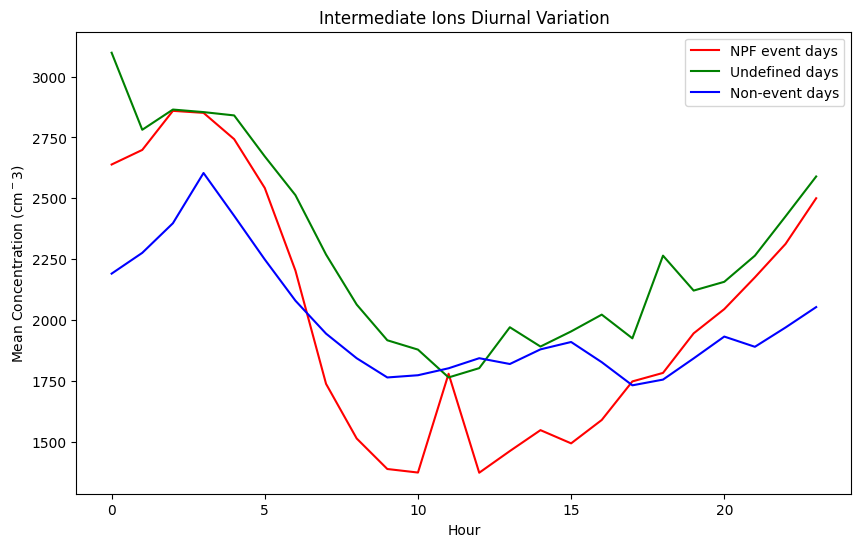

In [91]:
# Plotting all the curves simultaneously 
plt.figure(figsize=(10,6))
plt.plot(npf_ipmean_diurnal.index, npf_ipmean_diurnal+npf_inmean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_ipmean_diurnal.index, undef_ipmean_diurnal+undef_inmean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_ipmean_diurnal.index, nonevent_ipmean_diurnal+nonevent_inmean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean Concentration (cm$^-3$)')
plt.title('Intermediate Ions Diurnal Variation')

plt.legend()
plt.show()

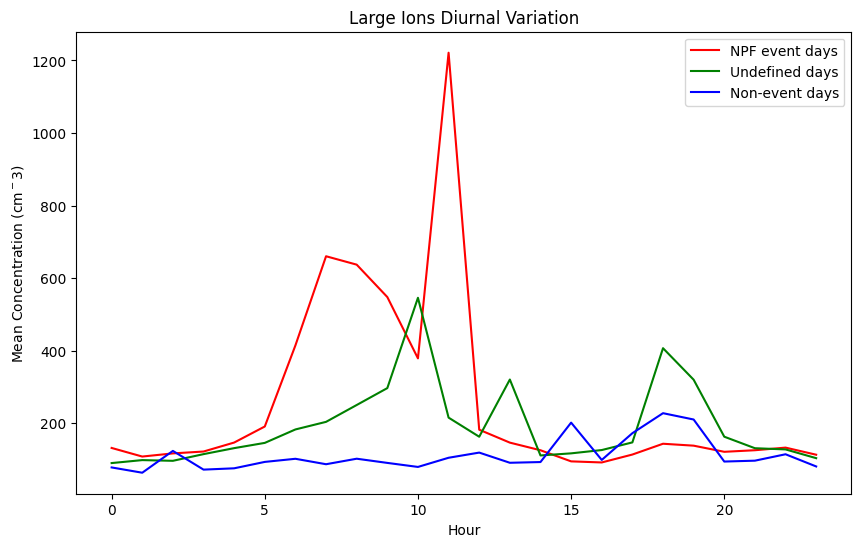

In [92]:
# Plotting all the curves simultaneously 
plt.figure(figsize=(10,6))
plt.plot(npf_lpmean_diurnal.index, npf_lpmean_diurnal+npf_lnmean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_lpmean_diurnal.index, undef_lpmean_diurnal+undef_lnmean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_lpmean_diurnal.index, nonevent_lpmean_diurnal+nonevent_lnmean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean Concentration (cm$^-3$)')
plt.title('Large Ions Diurnal Variation')

plt.legend()
plt.show()